# HistStack

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x17c000e80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x17c045af0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x17c0687f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

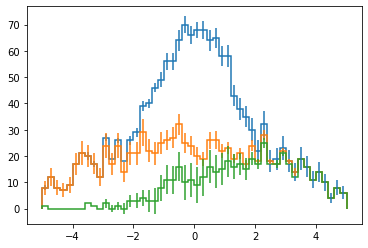

In [1]:
from hist import Hist, Stack, axis, NamedHist, BaseHist
import numpy as np

ax = axis.Regular(50, -5, 5, underflow=False, overflow=False)

h1 = Hist(ax).fill(2 * np.random.normal(size=500) + 2 * np.ones((500,)))

h2 = Hist(ax).fill(2 * np.random.normal(size=500) - 2 * np.ones((500,)))

h3 = Hist(ax).fill(np.random.normal(size=600))

Stack(h1, h2, h3).plot()

In [2]:
named_ax1 = axis.Regular(
    50, -5, 5, name="A", label="a [unit]", underflow=False, overflow=False
)
named_ax2 = axis.Regular(
    50, -5, 5, name="B", label="b [unit]", underflow=False, overflow=False
)
h4 = NamedHist(named_ax1, named_ax2)
print(repr(Stack(named_ax1, named_ax1)))  # not plotable
print(repr(Stack(h4)))  # plotable

Stack["Regular(50, -5, 5, underflow=False, overflow=False, name='A', label='a [unit]')", "Regular(50, -5, 5, underflow=False, overflow=False, name='A', label='a [unit]')"]
Stack["NamedHist(\n  Regular(50, -5, 5, underflow=False, overflow=False, name='A', label='a [unit]'),\n  Regular(50, -5, 5, underflow=False, overflow=False, name='B', label='b [unit]'),\n  storage=Double())"]


In [3]:
h4.stack(1, 1)  # h4.stack(0, 1) could not work as names are different

Stack["Regular(50, -5, 5, underflow=False, overflow=False, name='B', label='b [unit]')", "Regular(50, -5, 5, underflow=False, overflow=False, name='B', label='b [unit]')"]

In [4]:
h4.stack("B", "B")

Stack["Regular(50, -5, 5, underflow=False, overflow=False, name='B', label='b [unit]')", "Regular(50, -5, 5, underflow=False, overflow=False, name='B', label='b [unit]')"]

In [5]:
h5 = Hist.new.Reg(50, -5, 5, name="C").StrCat(["one", "two"], name="y").Double()
Stack(h5[:, "one"], h5[:, "two"])

Stack["Hist(Regular(50, -5, 5, name='C', label='C'), storage=Double())", "Hist(Regular(50, -5, 5, name='C', label='C'), storage=Double())"]